<a href="https://colab.research.google.com/github/Athman-Athman/RESEARCH/blob/main/RESEARCH_DATA_ANALYSIS_VTT_NOV_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA

In [68]:
# Importing libraries and reloading the data
import pandas as pd

# Loading the dataset
file_path = './DATA_RESEARCH - Copy.xlsx'
data = pd.read_excel(file_path)

# Retrieving the number of rows and columns
rows, columns = data.shape

rows, columns


(3091, 81)

In [69]:
# Display the variables (column names) in Sheet1
for i, column in enumerate(data.columns, start=1):
    print(f"{i}. {column}")


1. SN
2. VESSEL
3. REFERENCE NUMBER
4. VOYAGE NUMBER
5. LOA
6. ROT
7. BERTH
8. DRAFT (ARRIVAL)
9. DRAFT (DEPARTURE)
10. LINE
11. SERVICE
12. DISCHARGED-(FULL/ FCL-20')
13. DISCHARGED-(FULL/ FCL-40')
14. DISCHARGED-(FULL/ LCL-20')
15. DISCHARGED-(FULL/ LCL-40')
16. DISCHARGED-(EMPTY-20')
17. DISCHARGED-(EMPTY-40')
18. DISCHARGED-(REEFER-20')
19. DISCHARGED-(REEFER-40')
20. DISCHARGED-(HAZARDOUS-20')
21. DISCHARGED-(HAZARDOUS-40')
22. DISCHARGED-(OUT OF GAUGE-20')
23. DISCHARGED-(OUT OF GAUGE-40')
24. DISCHARGED-(TRANS SHIPMENT-20')
25. DISCHARGED-(TRANS SHIPMENT-40')
26. DISCHARGED-(ON BOARD SHIFTING-20')
27. DISCHARGED-(ON BOARD SHIFTING-40')
28. DISCHARGED-(SHIFTING VIA QUAY-20')
29. DISCHARGED-(SHIFTING VIA QUAY-40')
30. LOADED-(FULL/ FCL-20')
31. LOADED-(FULL/ FCL-40')
32. LOADED-(FULL/ LCL-20')
33. LOADED-(FULL/ LCL-40')
34. LOADED-(EMPTY-20')
35. LOADED-(EMPTY-40')
36. LOADED-(REEFER-20')
37. LOADED-(REEFER-40')
38. LOADED-(HAZARDOUS-20')
39. LOADED-(HAZARDOUS-40')
40. LOADED-(OUT

CHAPTER 4
DATA-PRE PROCESSING

1. Data Cleaning and Handling Missing Values

In [70]:
!pip install ace_tools

In [71]:
# Identify missing data percentage for each column
missing_data = data.isnull().sum() / len(data) * 100
missing_data_df = pd.DataFrame({
    "Column": data.columns,
    "Missing Percentage": missing_data
}).sort_values(by="Missing Percentage", ascending=False)

# Display missing data details
missing_data_df.head(20)



,Column,Missing Percentage
MACHINE TYPE,MACHINE TYPE,48.398577
LOA,LOA,29.310903
DRAFT (DEPARTURE),DRAFT (DEPARTURE),4.432223
ROT,ROT,3.785183
DRAFT (ARRIVAL),DRAFT (ARRIVAL),1.035264
SERVICE,SERVICE,0.549984
LOADED-(FULL/ LCL-40'),LOADED-(FULL/ LCL-40'),0.517632
LOADED-(FULL/ LCL-20'),LOADED-(FULL/ LCL-20'),0.517632
AVGE MOVE /SW HR,AVGE MOVE /SW HR,0.388224
SHIP WORKING HOURS,SHIP WORKING HOURS,0.355872


In [72]:
# Implement the recommended actions on the dataset

# 1. Impute 'MACHINE TYPE' with mode (most frequent value)
if 'MACHINE TYPE' in data.columns:
    mode_value = data['MACHINE TYPE'].mode()[0]
    data['MACHINE TYPE'] = data['MACHINE TYPE'].fillna(mode_value)

# 2. Impute 'LOA' with the median
if 'LOA' in data.columns:
    data['LOA'] = pd.to_numeric(data['LOA'], errors='coerce')  # Ensure numeric conversion
    median_loa = data['LOA'].median()
    data['LOA'] = data['LOA'].fillna(median_loa)

# 3. Impute 'DRAFT (DEPARTURE)' with the median
if 'DRAFT (DEPARTURE)' in data.columns:
    data['DRAFT (DEPARTURE)'] = pd.to_numeric(data['DRAFT (DEPARTURE)'], errors='coerce')  # Ensure numeric conversion
    median_draft_departure = data['DRAFT (DEPARTURE)'].median()
    data['DRAFT (DEPARTURE)'] = data['DRAFT (DEPARTURE)'].fillna(median_draft_departure)

# 4. Drop 'ROT' since it was deemed not critical
if 'ROT' in data.columns:
    data = data.drop(columns=['ROT'])

# 5. Impute 'DRAFT (ARRIVAL)' with the median
if 'DRAFT (ARRIVAL)' in data.columns:
    data['DRAFT (ARRIVAL)'] = pd.to_numeric(data['DRAFT (ARRIVAL)'], errors='coerce')  # Ensure numeric conversion
    median_draft_arrival = data['DRAFT (ARRIVAL)'].median()
    data['DRAFT (ARRIVAL)'] = data['DRAFT (ARRIVAL)'].fillna(median_draft_arrival)

# Display the updated dataset information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3091 entries, 0 to 3090
Data columns (total 80 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   SN                                  3091 non-null   int64         
 1   VESSEL                              3091 non-null   object        
 2   REFERENCE NUMBER                    3090 non-null   object        
 3   VOYAGE NUMBER                       3090 non-null   object        
 4   LOA                                 3091 non-null   float64       
 5   BERTH                               3091 non-null   object        
 6   DRAFT (ARRIVAL)                     3091 non-null   float64       
 7   DRAFT (DEPARTURE)                   3091 non-null   float64       
 8   LINE                                3091 non-null   object        
 9   SERVICE                             3074 non-null   object        
 10  DISCHARGED-(FULL/ FCL-20

Standardize Features Types

In [73]:
# Standardize the feature types in the dataset

# Convert columns with datetime information to pandas datetime
datetime_columns = ['ARRIVED BERTH', 'TIME/DATE SAILED', 'COMMENCE OPS',
                    'COMPL. OP','DROP PILOT']  # Adjust as needed
for col in datetime_columns:
    if col in data.columns:
        data[col] = pd.to_datetime(data[col], errors='coerce')

# Convert numeric columns to appropriate numeric types
numeric_columns = ['LOA','DRAFT (ARRIVAL)','DRAFT (DEPARTURE)','TOTAL TEUs',
                   'PORT PRODUCTIVITY','BERTH PRODUCTIVITY','OPERATIONS PRODUCTIVITY']
for col in numeric_columns:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')

# Convert categorical columns to string or category type
categorical_columns = ['MACHINE TYPE']  # Adjust as needed
for col in categorical_columns:
    if col in data.columns:
        data[col] = data[col].astype(str)

# Display the updated dataset info
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3091 entries, 0 to 3090
Data columns (total 80 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   SN                                  3091 non-null   int64         
 1   VESSEL                              3091 non-null   object        
 2   REFERENCE NUMBER                    3090 non-null   object        
 3   VOYAGE NUMBER                       3090 non-null   object        
 4   LOA                                 3091 non-null   float64       
 5   BERTH                               3091 non-null   object        
 6   DRAFT (ARRIVAL)                     3091 non-null   float64       
 7   DRAFT (DEPARTURE)                   3091 non-null   float64       
 8   LINE                                3091 non-null   object        
 9   SERVICE                             3074 non-null   object        
 10  DISCHARGED-(FULL/ FCL-20

In [74]:
data[['ARRIVED O/A','ARRIVED BERTH','COMMENCE OPS','COMPL. OP']]

,ARRIVED O/A,ARRIVED BERTH,COMMENCE OPS,COMPL. OP
0,2011-12-24 05:42:00,2011-12-31 14:50:00,2011-12-31 16:00:00,2012-01-01 21:15:00
1,2011-12-28 14:48:00,2012-01-02 01:55:00,2012-01-02 03:00:00,2012-01-02 23:00:00
2,2011-12-22 07:42:00,2012-02-01 01:40:00,2012-01-02 02:30:00,2012-01-03 04:00:00
3,2011-12-21 10:20:00,2011-12-31 20:40:00,2011-12-31 22:50:00,2012-01-03 13:00:00
4,2011-12-24 12:00:00,2012-01-03 12:45:00,2012-01-03 14:15:00,2012-01-05 08:00:00
...,...,...,...,...
3086,2022-12-21 06:54:00,2022-12-27 12:40:00,2022-12-27 14:03:00,2022-12-28 04:55:00
3087,2022-12-16 11:18:00,2022-12-24 19:40:00,2022-12-24 21:07:00,2022-12-29 15:00:00
3088,2022-12-16 21:36:00,2022-12-27 02:35:00,2022-12-27 04:48:00,2022-12-30 19:00:00
3089,2022-12-23 10:38:00,2022-12-28 12:20:00,2022-12-28 20:34:00,2022-12-30 19:45:00


In [75]:
# Retrieving the number of rows and columns
rows, columns = data.shape

rows, columns

(3091, 80)

2. Understanding Feature Distributions

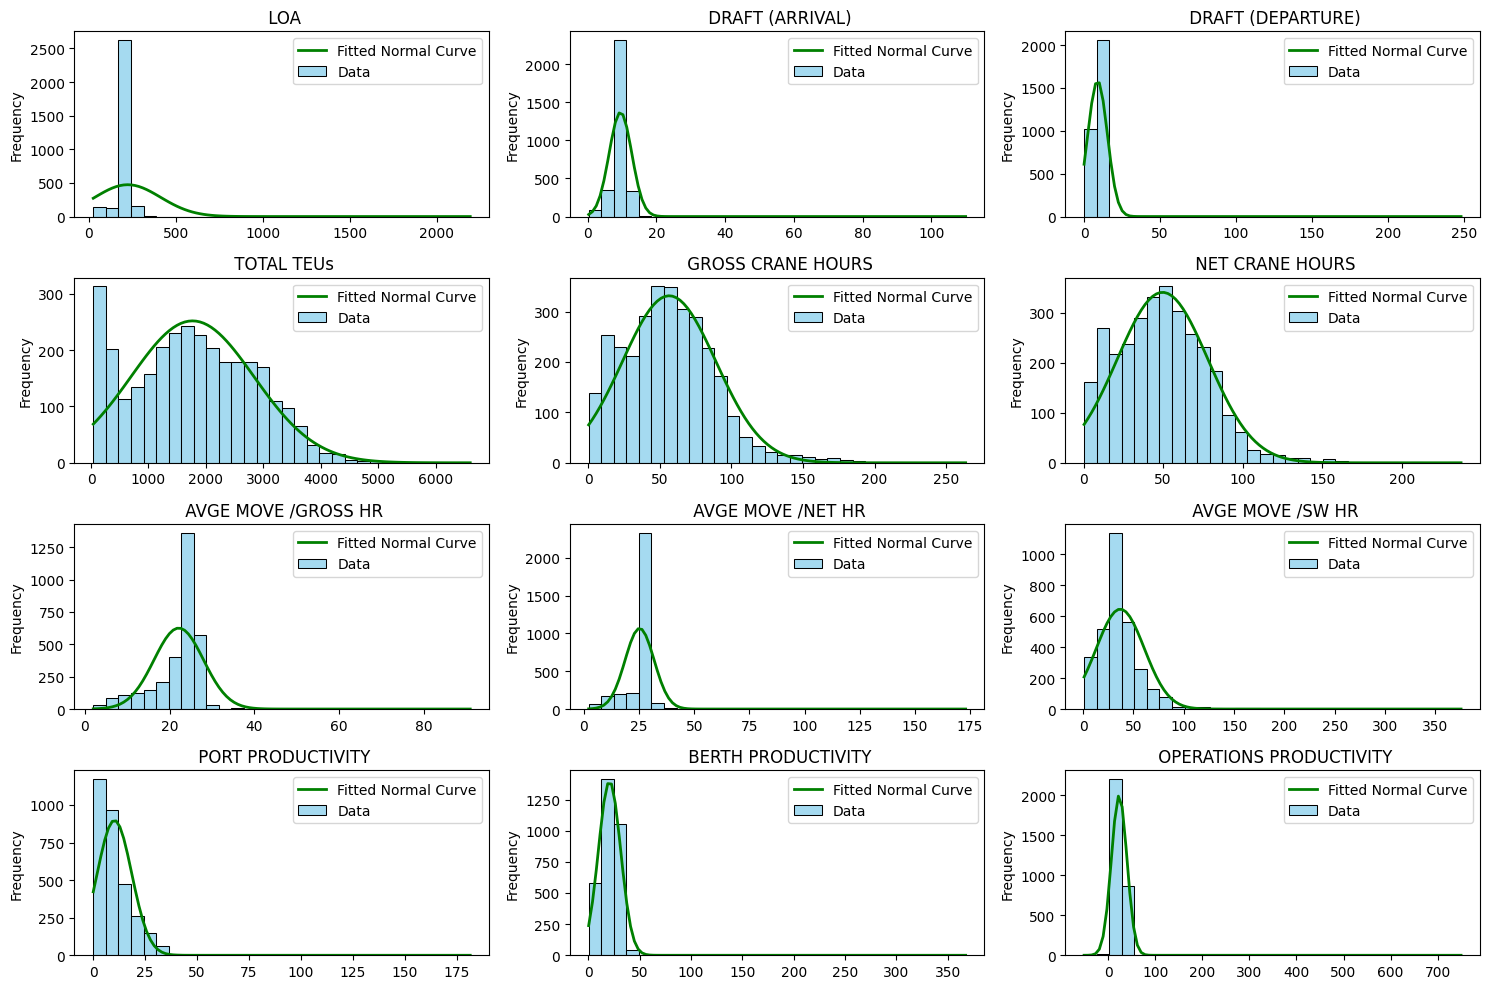

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# List of numeric features to visualize
numeric_features = ['LOA','DRAFT (ARRIVAL)','DRAFT (DEPARTURE)','TOTAL TEUs',
                    'GROSS CRANE HOURS','NET CRANE HOURS','AVGE MOVE /GROSS HR',
                    'AVGE MOVE /NET HR','AVGE MOVE /SW HR','PORT PRODUCTIVITY',
                    'BERTH PRODUCTIVITY','OPERATIONS PRODUCTIVITY']

# Set up the figure for subplots
plt.figure(figsize=(15, 10))

# Loop through features and create a subplot for each
for i, feature in enumerate(numeric_features, 1):
    if feature in data.columns:
        plt.subplot(4, 3, i)  # Adjust rows/columns as needed

        # Plot histogram
        sns.histplot(data[feature], kde=False, bins=30, color='skyblue', edgecolor='black', label='Data')

        # Fit and overlay a normal distribution
        mean, std = data[feature].mean(), data[feature].std()
        x = np.linspace(data[feature].min(), data[feature].max(), 100)
        plt.plot(x, norm.pdf(x, mean, std) * len(data[feature]) * (data[feature].max() - data[feature].min()) / 30,
                 color='green', lw=2, label='Fitted Normal Curve')

        plt.title(f" {feature}")
        plt.xlabel("")
        plt.ylabel("Frequency")
        plt.legend()

plt.tight_layout()
plt.show()


3. Detecting and Handling Outliers

In [77]:
# Outlier Analysis using IQR
import pandas as pd

outlier_summary = {}
key_features = ['LOA','DRAFT (ARRIVAL)','DRAFT (DEPARTURE)','TOTAL TEUs',
                'GROSS CRANE HOURS','NET CRANE HOURS','AVGE MOVE /GROSS HR',
                'AVGE MOVE /NET HR','AVGE MOVE /SW HR','PORT PRODUCTIVITY',
                'BERTH PRODUCTIVITY','OPERATIONS PRODUCTIVITY']

for feature in key_features:
    if feature in data.columns:
        # Calculate IQR
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1

        # Define lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
        outlier_summary[feature] = {
            "Total Outliers": len(outliers),
            "Lower Bound": lower_bound,
            "Upper Bound": upper_bound,
            "Percentage of Outliers": len(outliers) / len(data) * 100
        }

# Convert summary to DataFrame
outlier_summary = pd.DataFrame.from_dict(outlier_summary, orient='index')

# Display the outlier analysis summary
from IPython.display import display

# Display outlier summary DataFrame in a tabular format
display(outlier_summary)



,Total Outliers,Lower Bound,Upper Bound,Percentage of Outliers
LOA,613,192.000000,232.000000,19.831770
DRAFT (ARRIVAL),288,5.900000,13.900000,9.317373
DRAFT (DEPARTURE),182,5.750000,11.750000,5.888062
TOTAL TEUs,6,-1554.250000,5055.750000,0.194112
GROSS CRANE HOURS,61,-31.372500,140.607500,1.973471
NET CRANE HOURS,40,-30.095000,127.065000,1.294080
AVGE MOVE /GROSS HR,314,12.619403,33.406121,10.158525
AVGE MOVE /NET HR,585,21.772661,31.574990,18.925914
AVGE MOVE /SW HR,198,-2.290230,69.863961,6.405694
PORT PRODUCTIVITY,115,-9.287366,27.786971,3.720479


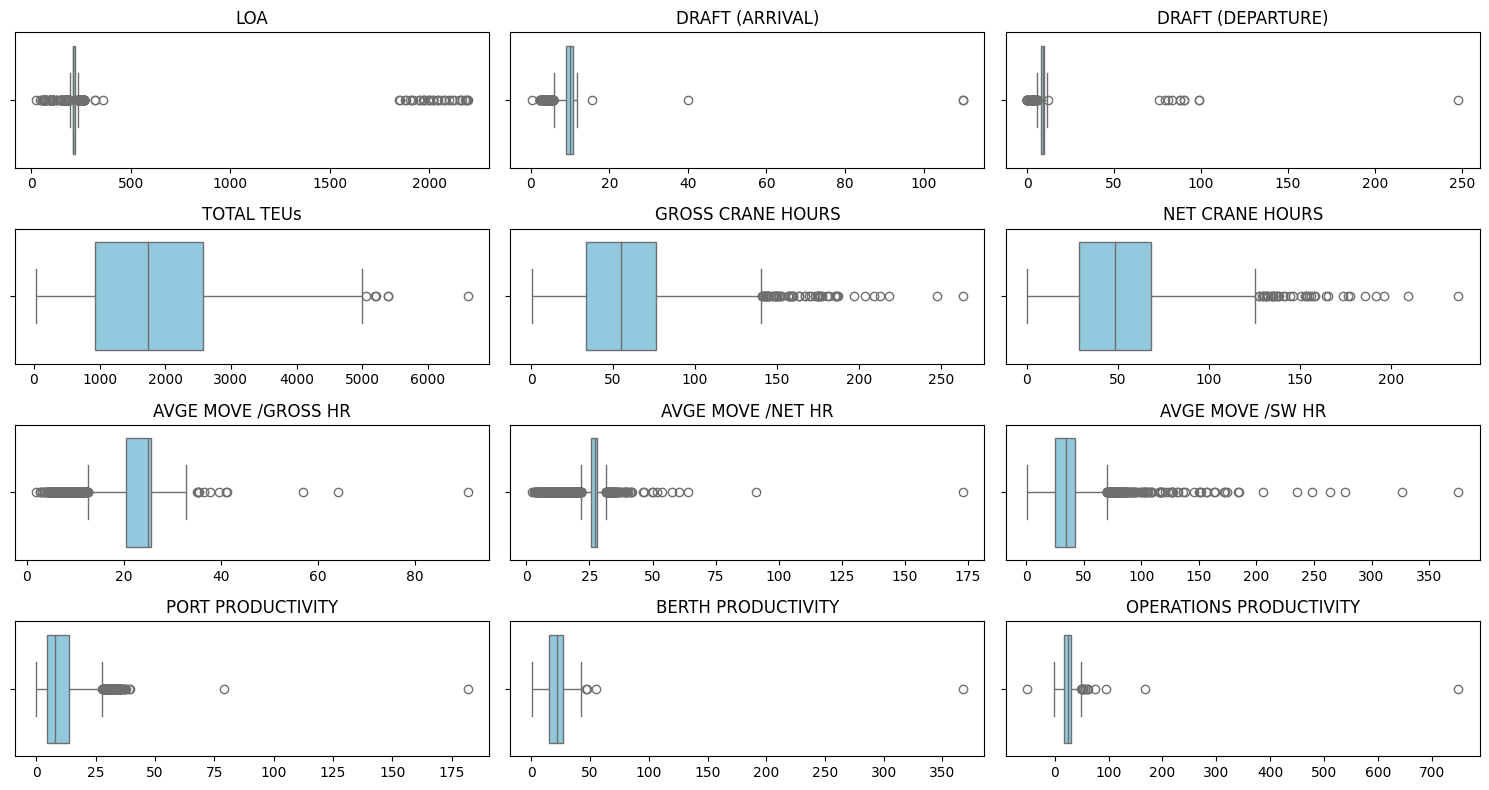

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure for subplots
plt.figure(figsize=(15, 8))

# Loop through features and create a subplot for each
for i, feature in enumerate(key_features, 1):
    if feature in data.columns:
        plt.subplot(4, 3, i)  # Adjust rows/columns as needed
        sns.boxplot(x=data[feature], color='skyblue')
        plt.title(f"{feature}")
        plt.xlabel("")  # Remove x-labels
plt.tight_layout()
plt.show()


Save the dataset as cleaned

In [79]:
# Save the cleaned dataset to a new Excel file
data.to_excel("CLEANED_DATASET.xlsx", index=False)
print("Cleaned dataset saved as 'CLEANED_DATASET.xlsx'")


Cleaned dataset saved as 'CLEANED_DATASET.xlsx'


In [80]:
# Loading the dataset
file_path = './CLEANED_DATASET.xlsx'
df = pd.read_excel(file_path)

Transform outliers

In [81]:
# Transform outliers using a log transformation to reduce skewness

# Apply log transformation to features with outliers
for feature in key_features:
    if feature in df.columns:
        # Add a small constant to avoid log(0)
        df[feature] = np.log1p(df[feature])

# Verify the transformations by showing the updated summary statistics
df[key_features].describe()


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


,LOA,DRAFT (ARRIVAL),DRAFT (DEPARTURE),TOTAL TEUs,GROSS CRANE HOURS,NET CRANE HOURS,AVGE MOVE /GROSS HR,AVGE MOVE /NET HR,AVGE MOVE /SW HR,PORT PRODUCTIVITY,BERTH PRODUCTIVITY,OPERATIONS PRODUCTIVITY
count,3091.000000,3091.000000,3091.000000,3091.000000,3091.000000,3091.000000,3091.000000,3091.000000,3079.000000,3091.000000,3090.000000,3090.000000
mean,5.326637,2.325984,2.242876,7.159524,3.847799,3.715871,3.097307,3.227366,3.461446,2.181363,2.949008,3.069062
std,0.329381,0.252061,0.284153,0.967848,0.717701,0.728129,0.341587,0.316471,0.631843,0.718373,0.572347,0.542378
min,3.258097,0.262364,0.000000,3.663562,0.285179,0.285179,1.105646,1.150494,0.646952,0.056303,0.337773,-2.965193
25%,5.337538,2.292535,2.197225,6.830333,3.529884,3.395850,3.064065,3.275201,3.249117,1.725532,2.755915,2.869339
50%,5.351858,2.406945,2.282382,7.463363,4.021415,3.901771,3.255816,3.332627,3.569698,2.191695,3.116802,3.211456
75%,5.384495,2.476538,2.351375,7.854769,4.345298,4.235989,3.281328,3.363811,3.779774,2.700293,3.334219,3.420035
max,7.693026,4.709530,5.517453,8.795582,5.578181,5.472985,4.520800,5.158900,5.930804,5.207298,5.909169,6.621134


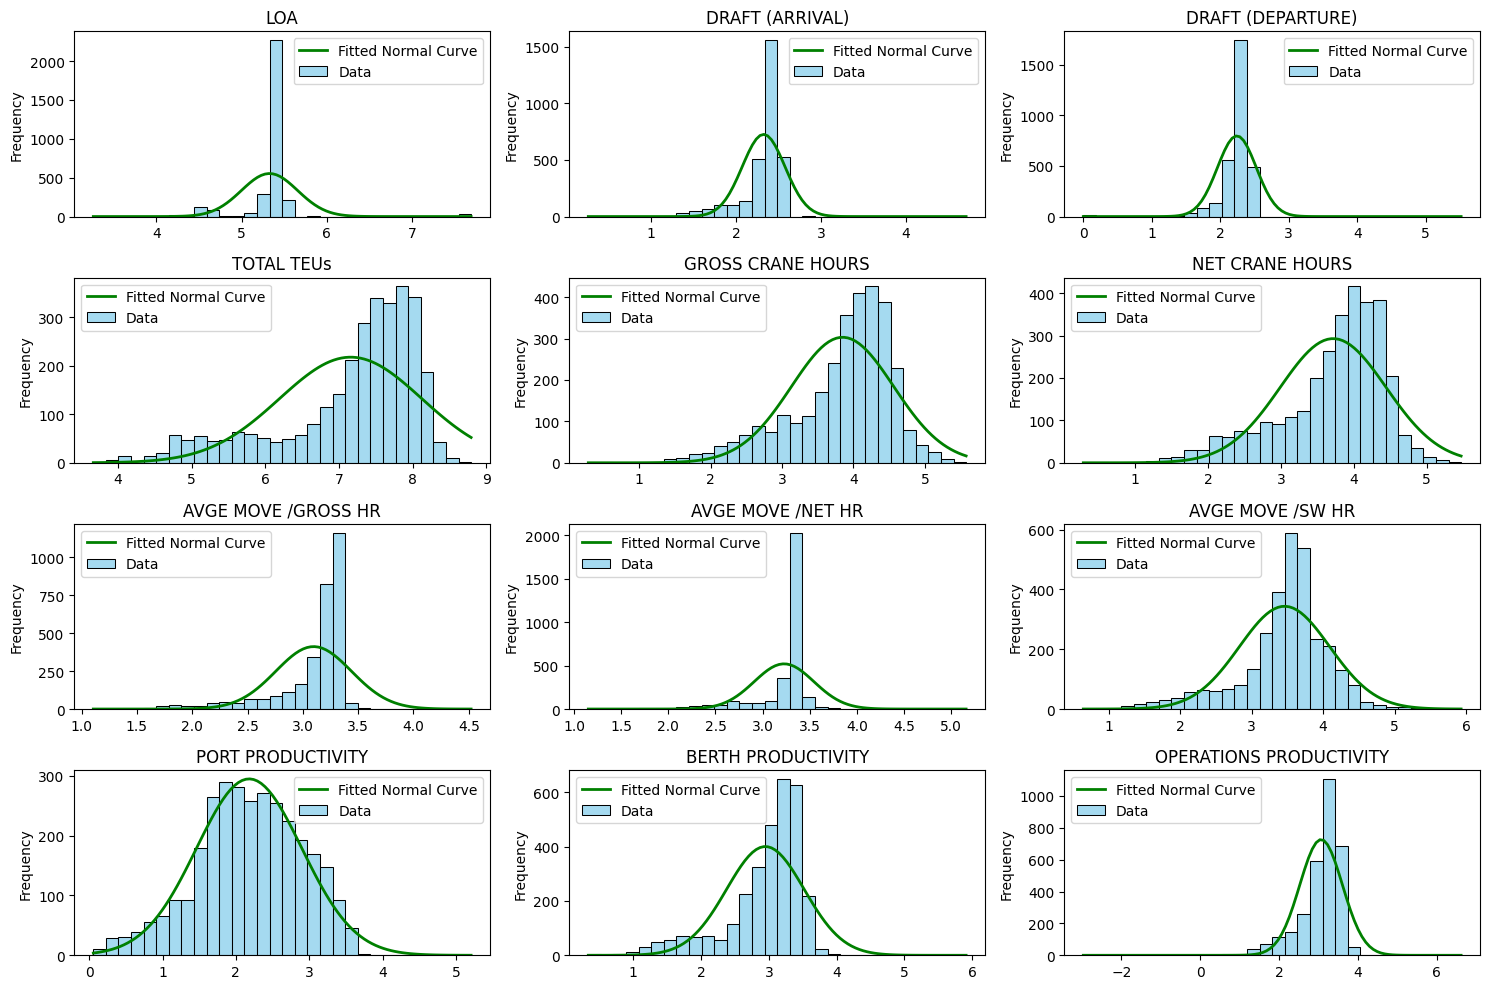

In [82]:
# Visualize transformed distributions
# Set up the figure for subplots
plt.figure(figsize=(15, 10))

# Loop through features and create a subplot for each
for i, feature in enumerate(numeric_features, 1):
    if feature in df.columns:
        plt.subplot(4, 3, i)  # Adjust rows/columns as needed

        # Plot histogram
        sns.histplot(df[feature], kde=False, bins=30, color='skyblue', edgecolor='black', label='Data')

        # Fit and overlay a normal distribution
        mean, std = df[feature].mean(), df[feature].std()
        x = np.linspace(df[feature].min(), df[feature].max(), 100)
        plt.plot(x, norm.pdf(x, mean, std) * len(df[feature]) * (df[feature].max() - df[feature].min()) / 30,
                 color='green', lw=2, label='Fitted Normal Curve')

        plt.title(f"{feature}")
        plt.xlabel("")
        plt.ylabel("Frequency")
        plt.legend()

plt.tight_layout()
plt.show()


Feature Engineering

Creation of new Features

In [127]:
# Create new feature
# Convert columns with datetime information to pandas datetime
datetime_columns = ['ARRIVED BERTH', 'TIME/DATE SAILED', 'COMMENCE OPS',
                    'COMPL. OP','DROP PILOT']  # Adjust as needed
for col in datetime_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Calculate the new variables
df['WAITING_TIME_TO_DOCK'] = df['ARRIVED BERTH'] - df['ARRIVED O/A']
df['WAITING_OPERATIONS'] = df['COMMENCE OPS'] - df['ARRIVED BERTH']
df['OPERATION_TIME'] = df['COMPL. OP'] - df['COMMENCE OPS']
df['UNLOADING_TIME'] = df['TIME/DATE SAILED'] - df['COMPL. OP']
df['TURN_AROUND_TIME'] = df['DROP PILOT'] - df['ARRIVED O/A']

# Covert the new variables to days
df['WAITING_TIME_TO_DOCK'] = df['WAITING_TIME_TO_DOCK'].dt.days
df['WAITING_OPERATIONS'] = df['WAITING_OPERATIONS'].dt.days
df['OPERATION_TIME'] = df['OPERATION_TIME'].dt.days
df['UNLOADING_TIME'] = df['UNLOADING_TIME'].dt.days
df['TURN_AROUND_TIME'] = df['TURN_AROUND_TIME'].dt.days

# Display the updated dataset with the new variables
df.head()

,SN,VESSEL,REFERENCE NUMBER,VOYAGE NUMBER,LOA,BERTH,DRAFT (ARRIVAL),DRAFT (DEPARTURE),LINE,SERVICE,...,AVGE MOVE /SW HR,PORT PRODUCTIVITY,BERTH PRODUCTIVITY,OPERATIONS PRODUCTIVITY,MACHINE TYPE,WAITING_TIME_TO_DOCK,WAITING_OPERATIONS,OPERATION_TIME,UNLOADING_TIME,TURN_AROUND_TIME
0,1,WEHR WARNOW,MSKC/WEHRWAR/1201,1201,5.351858,9,2.151762,2.272126,MSK,28J,...,3.281100,1.256319,2.851791,2.948927,SSG,7,0,1,0.0,8
1,2,ROYAL ZANZIBAR,MSCC/ROYZAN/1007R,1007R,5.351858,10,1.435085,1.704748,MSC,FEEDAR,...,2.234352,0.557329,1.651549,1.774952,SC,4,0,0,0.0,5
2,3,MANTENHA,MSCC/MVMANT/160R,160R,5.351858,9,1.481605,1.704748,MSC,FEEDAR,...,2.215203,0.297777,1.457848,1.593627,SC,40,-30,1,0.0,12
3,4,PARDIS,HDSC/PARDIS/SAS0017,SAS0017,5.351858,11,2.517696,2.370244,HDSC,AMET,...,3.210872,1.532657,2.903195,2.975283,SSG,10,0,2,0.0,13
4,5,MSC JASMINE,MSCC/MSCJAS/52R,52R,5.351858,9,2.501436,2.397895,MSC,DAR,...,3.442847,1.399683,3.005250,3.092402,SSG,10,0,1,0.0,11


In [128]:
# Filter the dataset to show rows where any of the new variables have negative values
negative_values = df[
    (df['WAITING_TIME_TO_DOCK'] < 0) |
    (df['WAITING_OPERATIONS'] < 0)|
    (df['OPERATION_TIME'] < 0)|
    (df['UNLOADING_TIME'] < 0) |
    (df['TURN_AROUND_TIME'] < 0)
]
negative_values[['WAITING_TIME_TO_DOCK','WAITING_OPERATIONS','OPERATION_TIME',
                 'UNLOADING_TIME','TURN_AROUND_TIME']]


,WAITING_TIME_TO_DOCK,WAITING_OPERATIONS,OPERATION_TIME,UNLOADING_TIME,TURN_AROUND_TIME
2,40,-30,1,0.0,12
207,10,0,4,0.0,-15658
213,5,0,4,0.0,-15669
263,0,0,2,0.0,-15741
345,1,1,-1,0.0,2
469,2,-1,2,0.0,5
488,3,-1,2,0.0,6
568,5,0,1,0.0,-16077
628,-18,18,2,0.0,3
638,2,0,1,0.0,-16160


In [129]:
# Count the number of rows with negative values for each of the new variables
negative_counts = {
    'WAITING_TIME_TO_DOCK': (df['WAITING_TIME_TO_DOCK'] < 0).sum(),
    'WAITING_OPERATIONS': (df['WAITING_OPERATIONS'] < 0).sum(),
    'OPERATION_TIME': (df['OPERATION_TIME'] < 0).sum(),
    'UNLOADING_TIME': (df['UNLOADING_TIME'] < 0).sum(),
    'TURN_AROUND_TIME': (df['TURN_AROUND_TIME'] < 0).sum()
}
negative_counts

{'WAITING_TIME_TO_DOCK': 1,
 'WAITING_OPERATIONS': 4,
 'OPERATION_TIME': 2,
 'UNLOADING_TIME': 0,
 'TURN_AROUND_TIME': 28}

In [130]:
# Drop rows with negative values in any of the newly created variables
DATA_NEW_VARIABLES = df[
    (df['WAITING_TIME_TO_DOCK'] >= 0) &
    (df['WAITING_OPERATIONS'] >= 0) &
    (df['OPERATION_TIME'] >= 0) &
    (df['UNLOADING_TIME'] >= 0)&
    (df['TURN_AROUND_TIME'] >= 0)
]

# Display the shape of the dataset after dropping rows
DATA_NEW_VARIABLES.shape

(3055, 85)

Conduct EDA for new Variables

<ipython-input-131-4d25bb90eca0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATA_NEW_VARIABLES[col] = pd.to_numeric(DATA_NEW_VARIABLES[col], errors='coerce')


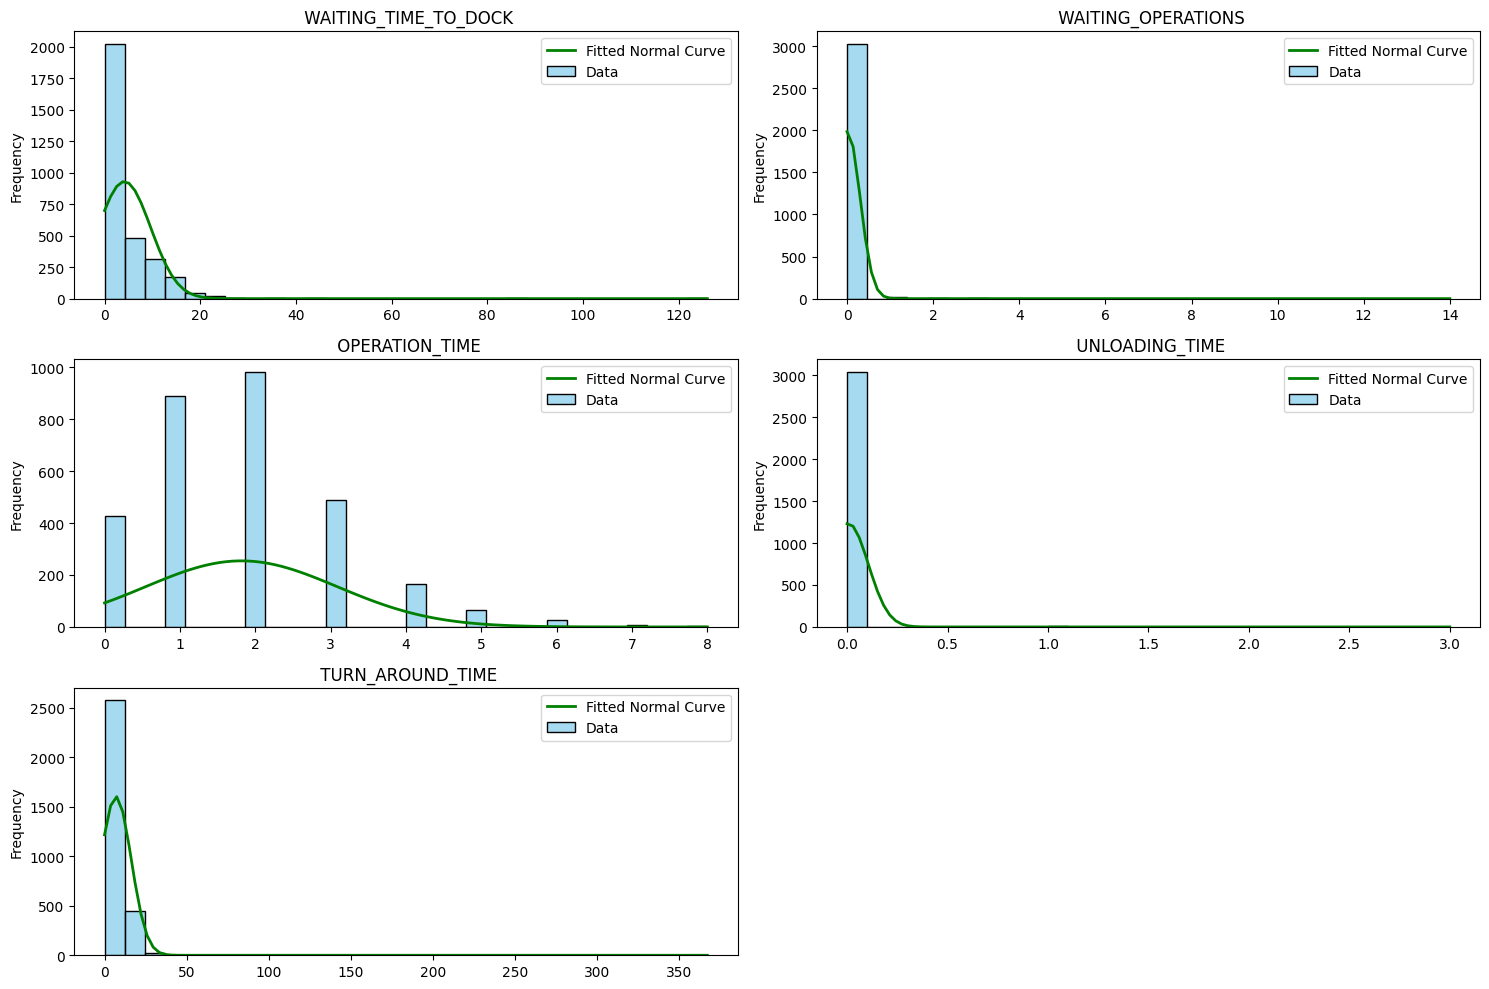

In [131]:
# Convert numeric columns to appropriate numeric types
new_variables = ['WAITING_TIME_TO_DOCK','WAITING_OPERATIONS','OPERATION_TIME','UNLOADING_TIME',
                   'TURN_AROUND_TIME']
for col in new_variables:
    if col in DATA_NEW_VARIABLES.columns:
        DATA_NEW_VARIABLES[col] = pd.to_numeric(DATA_NEW_VARIABLES[col], errors='coerce')

# Set up the figure for subplots
plt.figure(figsize=(15, 10))

# Loop through features and create a subplot for each
for i, feature in enumerate(new_variables, 1):
    if feature in DATA_NEW_VARIABLES.columns:
        plt.subplot(3, 2, i)  # Adjust rows/columns as needed

        # Plot histogram
        sns.histplot(DATA_NEW_VARIABLES[feature], kde=False, bins=30, color='skyblue', edgecolor='black', label='Data')

        # Fit and overlay a normal distribution
        mean, std = DATA_NEW_VARIABLES[feature].mean(), DATA_NEW_VARIABLES[feature].std()
        x = np.linspace(DATA_NEW_VARIABLES[feature].min(), DATA_NEW_VARIABLES[feature].max(), 100)
        plt.plot(x, norm.pdf(x, mean, std) * len(DATA_NEW_VARIABLES[feature]) * (DATA_NEW_VARIABLES[feature].max() - DATA_NEW_VARIABLES[feature].min()) / 30,
                 color='green', lw=2, label='Fitted Normal Curve')

        plt.title(f" {feature}")
        plt.xlabel("")
        plt.ylabel("Frequency")
        plt.legend()

plt.tight_layout()
plt.show()


transform outliers

In [156]:
# Transform outliers using a log transformation to reduce skewness

# Apply log transformation to features with outliers
for feature in new_variables:
    if feature in DATA_NEW_VARIABLES.columns:
        # Add a small constant to avoid log(0)
        DATA_NEW_VARIABLES[feature] = np.log1p(DATA_NEW_VARIABLES[feature])

# Verify the transformations by showing the updated summary statistics
DATA_NEW_VARIABLES[new_variables].describe()

<ipython-input-156-0b1a0c3ed624>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATA_NEW_VARIABLES[feature] = np.log1p(DATA_NEW_VARIABLES[feature])


,WAITING_TIME_TO_DOCK,WAITING_OPERATIONS,OPERATION_TIME,UNLOADING_TIME,TURN_AROUND_TIME
count,3055.000000,3055.000000,3055.000000,3055.000000,3055.000000
mean,1.192892,0.007997,0.926949,0.004671,1.795042
std,0.956660,0.092089,0.484490,0.060639,0.723423
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.693147,0.000000,1.386294
50%,1.098612,0.000000,1.098612,0.000000,1.791759
75%,2.079442,0.000000,1.098612,0.000000,2.397895
max,4.844187,2.708050,2.197225,1.386294,5.908083


In [157]:
DATA_NEW_VARIABLES['TURN_AROUND_TIME']

,TURN_AROUND_TIME
0,2.197225
1,1.791759
3,2.639057
4,2.484907
5,2.639057
...,...
3086,2.079442
3087,2.639057
3088,2.639057
3089,2.079442


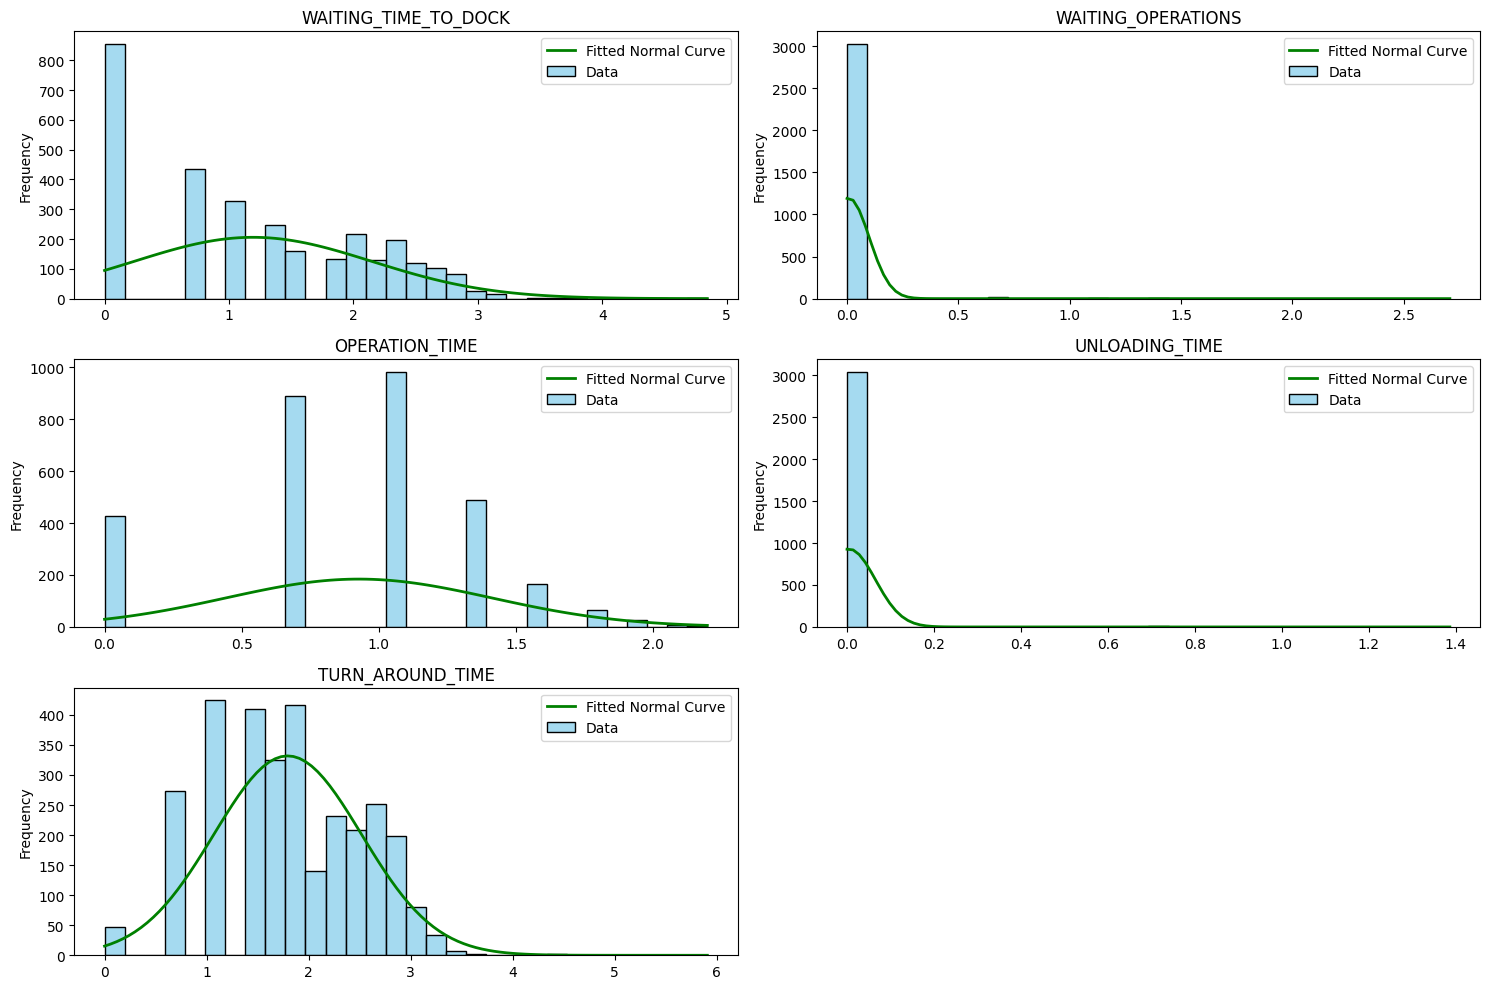

In [158]:
# Visualize transformed distributions
# Set up the figure for subplots
plt.figure(figsize=(15, 10))

# Loop through features and create a subplot for each
for i, feature in enumerate(new_variables, 1):
    if feature in DATA_NEW_VARIABLES.columns:
        plt.subplot(3, 2, i)  # Adjust rows/columns as needed

        # Plot histogram
        sns.histplot(DATA_NEW_VARIABLES[feature], kde=False, bins=30, color='skyblue', edgecolor='black', label='Data')

        # Fit and overlay a normal distribution
        mean, std = DATA_NEW_VARIABLES[feature].mean(), DATA_NEW_VARIABLES[feature].std()
        x = np.linspace(DATA_NEW_VARIABLES[feature].min(), DATA_NEW_VARIABLES[feature].max(), 100)
        plt.plot(x, norm.pdf(x, mean, std) * len(DATA_NEW_VARIABLES[feature]) * (DATA_NEW_VARIABLES[feature].max() - DATA_NEW_VARIABLES[feature].min()) / 30,
                 color='green', lw=2, label='Fitted Normal Curve')

        plt.title(f"{feature}")
        plt.xlabel("")
        plt.ylabel("Frequency")
        plt.legend()

plt.tight_layout()
plt.show()

Categorical Feature Encoding

In [160]:
# Clean 'MACHINE TYPE' column
if 'MACHINE TYPE' in DATA_NEW_VARIABLES.columns:
    # Strip whitespace
    DATA_NEW_VARIABLES['MACHINE TYPE'] = DATA_NEW_VARIABLES['MACHINE TYPE'].str.strip()

    # Replace inconsistent values
    DATA_NEW_VARIABLES['MACHINE TYPE'] = DATA_NEW_VARIABLES['MACHINE TYPE'].replace('SS', 'SC')
    DATA_NEW_VARIABLES['MACHINE TYPE'] = DATA_NEW_VARIABLES['MACHINE TYPE'].replace('SGG', 'SSG')
    DATA_NEW_VARIABLES['MACHINE TYPE'] = DATA_NEW_VARIABLES['MACHINE TYPE'].replace('SCG', 'SSG')

# Check the unique values after cleaning
print(DATA_NEW_VARIABLES['MACHINE TYPE'].value_counts())


MACHINE TYPE
SSG    2922
SC      133
Name: count, dtype: int64


<ipython-input-160-64eb96112a39>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATA_NEW_VARIABLES['MACHINE TYPE'] = DATA_NEW_VARIABLES['MACHINE TYPE'].str.strip()
<ipython-input-160-64eb96112a39>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATA_NEW_VARIABLES['MACHINE TYPE'] = DATA_NEW_VARIABLES['MACHINE TYPE'].replace('SS', 'SC')
<ipython-input-160-64eb96112a39>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [162]:
from sklearn.preprocessing import LabelEncoder

# Convert 'MACHINE TYPE' to numeric values
if 'MACHINE TYPE' in DATA_NEW_VARIABLES.columns:
    label_encoder = LabelEncoder()
    DATA_NEW_VARIABLES['MACHINE_TYPE_NUMERIC'] = label_encoder.fit_transform(DATA_NEW_VARIABLES['MACHINE TYPE'])

# Display the mapping for reference
machine_type_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(machine_type_mapping)

{'SC': 0, 'SSG': 1}


<ipython-input-162-f619533df5d7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATA_NEW_VARIABLES['MACHINE_TYPE_NUMERIC'] = label_encoder.fit_transform(DATA_NEW_VARIABLES['MACHINE TYPE'])


SAVE THE FINAL DATASET FOR DEVELOPMENT OF THE MODEL

In [163]:
# Save the cleaned dataset to a new Excel file
DATA_NEW_VARIABLES.to_excel("CLEANED_FINAL_DATASET.xlsx", index=False)
print("Cleaned Final Dataset saved as 'CLEANED_FINAL_DATASET.xlsx'")

Cleaned Final Dataset saved as 'CLEANED_FINAL_DATASET.xlsx'


In [164]:
# Loading the dataset
file_path = './CLEANED_FINAL_DATASET.xlsx'
fd = pd.read_excel(file_path)
fd.describe()

,SN,LOA,DRAFT (ARRIVAL),DRAFT (DEPARTURE),DISCHARGED-(FULL/ FCL-20'),DISCHARGED-(FULL/ FCL-40'),DISCHARGED-(FULL/ LCL-20'),DISCHARGED-(FULL/ LCL-40'),DISCHARGED-(EMPTY-20'),DISCHARGED-(EMPTY-40'),...,AVGE MOVE /SW HR,PORT PRODUCTIVITY,BERTH PRODUCTIVITY,OPERATIONS PRODUCTIVITY,WAITING_TIME_TO_DOCK,WAITING_OPERATIONS,OPERATION_TIME,UNLOADING_TIME,TURN_AROUND_TIME,MACHINE_TYPE_NUMERIC
count,3055.000000,3055.000000,3055.000000,3055.000000,3055.000000,3054.000000,3055.000000,3054.000000,3054.00000,3055.000000,...,3043.000000,3055.000000,3055.000000,3055.000000,3055.000000,3055.000000,3055.000000,3055.000000,3055.000000,3055.000000
mean,1551.029133,5.326221,2.326622,2.243081,292.498200,243.787164,29.565303,4.789456,6.68664,1.148282,...,3.462832,2.181959,2.950075,3.071499,1.192892,0.007997,0.926949,0.004671,1.795042,0.956465
min,1.000000,3.258097,0.262364,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.646952,0.056303,0.337773,0.550529,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,777.500000,5.337538,2.292535,2.197225,165.000000,93.000000,0.000000,0.000000,0.00000,0.000000,...,3.249117,1.725532,2.755923,2.869749,0.000000,0.000000,0.693147,0.000000,1.386294,1.000000
50%,1554.000000,5.351858,2.406945,2.282382,287.000000,223.000000,10.000000,2.000000,0.00000,0.000000,...,3.569832,2.191695,3.117632,3.211514,1.098612,0.000000,1.098612,0.000000,1.791759,1.000000
75%,2324.500000,5.384495,2.476538,2.351375,418.000000,382.000000,41.000000,7.000000,0.00000,0.000000,...,3.781847,2.700293,3.334122,3.419800,2.079442,0.000000,1.098612,0.000000,2.397895,1.000000
max,3091.000000,7.693026,4.709530,5.517453,995.000000,1076.000000,645.000000,61.000000,905.00000,250.000000,...,5.930804,5.207298,5.909169,6.621134,4.844187,2.708050,2.197225,1.386294,5.908083,1.000000
std,893.409943,0.328167,0.252299,0.285335,187.427436,188.796615,48.813515,7.211821,42.19564,10.043648,...,0.632399,0.717640,0.570522,0.530502,0.956660,0.092089,0.484490,0.060639,0.723423,0.204092


FEATURE SELECTION

In [165]:
# Display the variables (column names) in Sheet1
for i, column in enumerate(fd.columns, start=1):
    print(f"{i}. {column}")

1. SN
2. VESSEL
3. REFERENCE NUMBER
4. VOYAGE NUMBER
5. LOA
6. BERTH
7. DRAFT (ARRIVAL)
8. DRAFT (DEPARTURE)
9. LINE
10. SERVICE
11. DISCHARGED-(FULL/ FCL-20')
12. DISCHARGED-(FULL/ FCL-40')
13. DISCHARGED-(FULL/ LCL-20')
14. DISCHARGED-(FULL/ LCL-40')
15. DISCHARGED-(EMPTY-20')
16. DISCHARGED-(EMPTY-40')
17. DISCHARGED-(REEFER-20')
18. DISCHARGED-(REEFER-40')
19. DISCHARGED-(HAZARDOUS-20')
20. DISCHARGED-(HAZARDOUS-40')
21. DISCHARGED-(OUT OF GAUGE-20')
22. DISCHARGED-(OUT OF GAUGE-40')
23. DISCHARGED-(TRANS SHIPMENT-20')
24. DISCHARGED-(TRANS SHIPMENT-40')
25. DISCHARGED-(ON BOARD SHIFTING-20')
26. DISCHARGED-(ON BOARD SHIFTING-40')
27. DISCHARGED-(SHIFTING VIA QUAY-20')
28. DISCHARGED-(SHIFTING VIA QUAY-40')
29. LOADED-(FULL/ FCL-20')
30. LOADED-(FULL/ FCL-40')
31. LOADED-(FULL/ LCL-20')
32. LOADED-(FULL/ LCL-40')
33. LOADED-(EMPTY-20')
34. LOADED-(EMPTY-40')
35. LOADED-(REEFER-20')
36. LOADED-(REEFER-40')
37. LOADED-(HAZARDOUS-20')
38. LOADED-(HAZARDOUS-40')
39. LOADED-(OUT OF GAUG

In [166]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Define target and candidate features
target = 'TURN_AROUND_TIME'
candidate_features = [
    'LOA','TOTAL TEUs','PORT PRODUCTIVITY','BERTH PRODUCTIVITY',
    'WAITING_TIME_TO_DOCK','WAITING_OPERATIONS','OPERATION_TIME',
    'UNLOADING_TIME','MACHINE_TYPE_NUMERIC'
]

# Drop rows with NaN values in target or candidate features
fd = fd.dropna(subset=[target] + candidate_features)

# Ensure target is numeric
fd[target] = fd[target].astype(float)

# Define features (X) and target (y)
X = fd[candidate_features]
y = fd[target]

# Feature Selection Techniques
# 1. Correlation with Target
correlation_matrix = X.join(y).corr()
correlation_with_target = correlation_matrix[target].sort_values(ascending=False)

# 2. Univariate Feature Selection
selector = SelectKBest(f_regression, k='all')
selector.fit(X, y)
univariate_scores = dict(zip(candidate_features, selector.scores_))

# 3. Model-Based Feature Importance (Random Forest)
model = RandomForestRegressor(random_state=42)
model.fit(X, y)
model_importances = dict(zip(candidate_features, model.feature_importances_))

# Combine results
feature_selection_results = {
    'Correlation with Target': correlation_with_target.to_dict(),
    'Univariate Scores': univariate_scores,
    'Model Importances': model_importances
}

# Combine results into a DataFrame for tabular representation
results_table = pd.DataFrame({
    'Feature': candidate_features,
    'Correlation with Target': [feature_selection_results['Correlation with Target'].get(f, None) for f in candidate_features],
    'Univariate Scores': [feature_selection_results['Univariate Scores'].get(f, None) for f in candidate_features],
    'Model Importances': [feature_selection_results['Model Importances'].get(f, None) for f in candidate_features],
})

# Sort results by Model Importances for better readability
results_table = results_table.sort_values(by='Model Importances', ascending=False)

# Print Results
print(results_table)

                Feature  Correlation with Target  Univariate Scores  \
4  WAITING_TIME_TO_DOCK                 0.903732       13605.631306   
6        OPERATION_TIME                 0.580030        1547.902902   
2     PORT PRODUCTIVITY                -0.438093         725.115149   
1            TOTAL TEUs                 0.466325         848.391398   
3    BERTH PRODUCTIVITY                 0.154310          74.470202   
0                   LOA                 0.152595          72.784580   
5    WAITING_OPERATIONS                 0.021330           1.389705   
8  MACHINE_TYPE_NUMERIC                 0.135462          57.069952   
7        UNLOADING_TIME                -0.000393           0.000471   

   Model Importances  
4           0.820287  
6           0.089377  
2           0.054010  
1           0.017315  
3           0.008972  
0           0.005576  
5           0.002589  
8           0.001370  
7           0.000504  


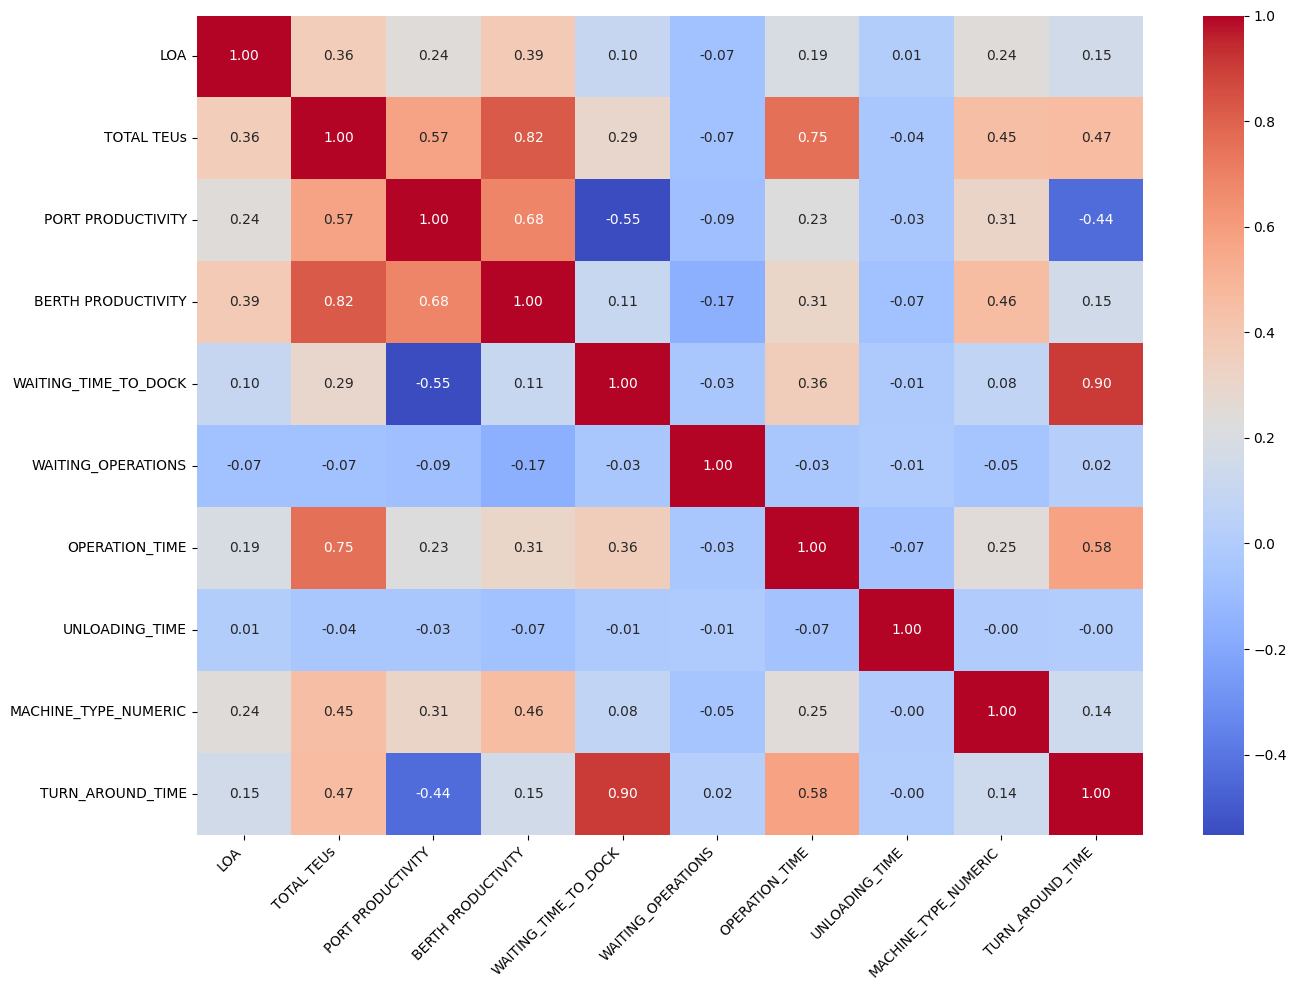

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix for candidate features and the target variable
correlation_matrix = fd[candidate_features + [target]].corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Add titles and labels
plt.title("", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


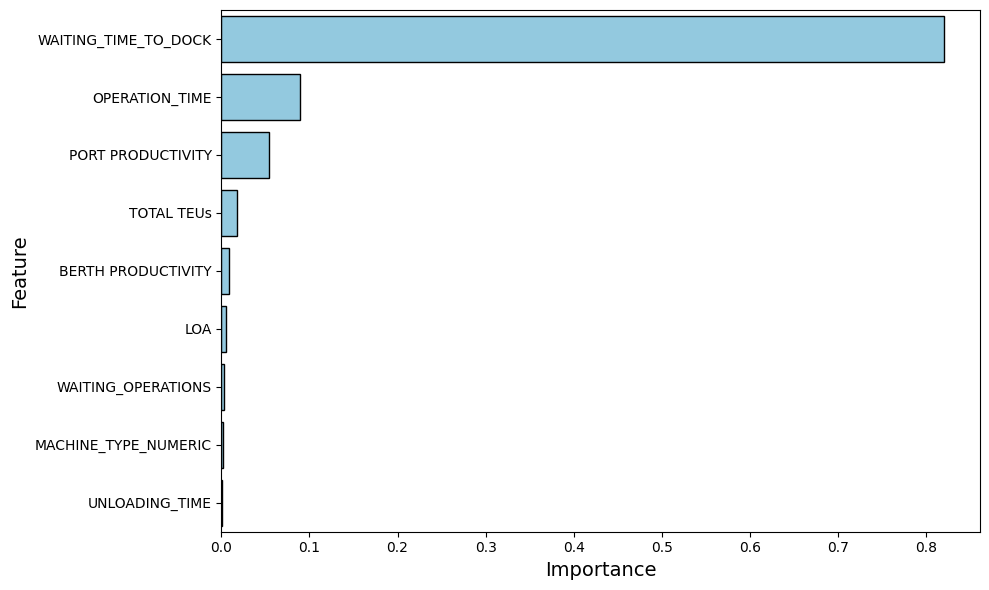

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort features by importance for better visualization
sorted_importances = results_table.sort_values(by='Model Importances', ascending=False)

# Plot histogram of feature importances
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Model Importances',
    y='Feature',
    data=sorted_importances,
    color='skyblue',
    edgecolor='black',
    linewidth=1,
)

# Add titles and labels
plt.title("", fontsize=16)
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.tight_layout()
plt.show()


Key Points from the Heatmap:

    Diagonal Values:
        All diagonal cells are 1.0, as they represent the correlation of each feature with itself.

    Correlation with Target (TURN_AROUND_TIME_HOURS):
        Look at the last row (TURN_AROUND_TIME_HOURS) for correlations with each feature.
        Features with stronger correlations (close to 1 or -1) are more predictive of the target.
        Example:
            MACHINE TYPE and TURN_AROUND_TIME_HOURS have a low correlation (~ -0.02).
            BERTH PRODUCTIVITY also shows minimal correlation (~ -0.05).

    Inter-feature Correlations:
        Strong inter-feature correlations can indicate multicollinearity, which might affect model performance.
        Example:
            PORT PRODUCTIVITY and BERTH PRODUCTIVITY have a strong positive correlation (~0.76).

    Feature Independence:
        Features with low correlation with others are independent and may carry unique predictive value.
        Example:
            WAITING_OPERATIONS is weakly correlated with most other features.

Observations for Feature Selection:

    Highly Correlated Features:
        BERTH PRODUCTIVITY and PORT PRODUCTIVITY are strongly correlated; consider using one of them to avoid redundancy.
    Weak Predictive Features:
        Features like UNLOADING_TIME and MACHINE TYPE show very low correlation with the target and may be excluded.
    Key Predictive Features:
        Features like OPERATION_TIME and TOTAL TEUs show moderate correlation (~0.65), making them strong candidates for inclusion.



Check Multicollinelity in the Selected Features

In [169]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Convert TimeDelta64DType columns to numeric (e.g., seconds)
timedelta_columns = df.select_dtypes(include=['timedelta64[ns]']).columns
for col in timedelta_columns:
    df[col] = df[col].dt.total_seconds()

# Ensure all numeric features for VIF calculation
numeric_features = [
    'LOA','TOTAL TEUs','PORT PRODUCTIVITY','BERTH PRODUCTIVITY',
    'WAITING_TIME_TO_DOCK','WAITING_OPERATIONS','OPERATION_TIME',
    'UNLOADING_TIME','MACHINE_TYPE_NUMERIC'
]

# Filter numeric features
existing_features = [f for f in numeric_features if f in df.columns]
df_numeric = df[existing_features].select_dtypes(include=[np.number])

# Check for NaN or Inf values and handle them
df_numeric = df_numeric.replace([np.inf, -np.inf], np.nan)  # Replace infinities with NaN
df_numeric = df_numeric.fillna(df_numeric.mean())           # Fill NaN with column mean

# Standardize features for VIF calculation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = df_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Display VIF results
print(vif_data)


                Feature        VIF
0                   LOA   1.184812
1            TOTAL TEUs  14.498146
2     PORT PRODUCTIVITY   4.430584
3    BERTH PRODUCTIVITY   9.361676
4  WAITING_TIME_TO_DOCK   2.724461
5    WAITING_OPERATIONS   1.064243
6        OPERATION_TIME   5.651748
7        UNLOADING_TIME   1.812859


How to Interpret VIF:

    VIF < 5: Low multicollinearity (acceptable).
    VIF 5-10: Moderate multicollinearity (may require attention).
    VIF > 10: High multicollinearity (consider removing or transforming features).


Explanation:

    VIF Calculation:
        The function calculate_vif computes the VIF for all features.

    Feature Removal:
        The feature with the highest VIF is removed iteratively until all remaining features have VIF <= 10.

    Final Output:
        Displays the refined feature set and their corresponding VIF values.

To optimize the refined features for modeling, we will:

    Standardize/Normalize Features:
        Ensure that all numeric features are scaled to have a similar range for better model performance.

    Handle Remaining Multicollinearity:
        Use Principal Component Analysis (PCA) or select uncorrelated subsets of features to reduce redundancy.

    Remove Low-Variance Features:
        Features with very low variance across the dataset may not contribute significantly to model performance.

    Check Feature-Target Relationships:
        Ensure features have a meaningful relationship with the target variable.

Implementation Plan:

    Standardize Features:
        Use StandardScaler to scale numeric features.

    Remove Low-Variance Features:
        Use VarianceThreshold to drop features with near-zero variance.

    Check and Address Remaining Multicollinearity:
        Use Variance Inflation Factor (VIF) or PCA.

    Reassess Model Performance:
        Fit a baseline model with the optimized feature set and validate its performance.

optimize features for the development of the model (ensure reduced multicollinearity, enhance predictive power, and maintain interpretability)

In [170]:
# Selected features
optimized_features = [
    'LOA','WAITING_TIME_TO_DOCK', 'WAITING_OPERATIONS','OPERATION_TIME',
    'UNLOADING_TIME','PORT PRODUCTIVITY','MACHINE_TYPE_NUMERIC',
    'TURN_AROUND_TIME'
]

# Drop redundant features
df_optimized = fd[optimized_features]

# Apply log transformation to skewed features
for feature in ['WAITING_TIME_TO_DOCK', 'OPERATION_TIME']:
    df_optimized[feature] = np.log1p(df_optimized[feature])

# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_optimized_scaled = scaler.fit_transform(df_optimized)

# Create DataFrame for model development
df_model_ready = pd.DataFrame(df_optimized_scaled, columns=optimized_features)

# Save the dataset for modeling
df_model_ready.to_excel("OPTIMIZED_FEATURES_FOR_MODEL.xlsx", index=False)
print("Optimized dataset saved as 'OPTIMIZED_FEATURES_FOR_MODEL.xlsx'")


<ipython-input-170-11e8529d2f5f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_optimized[feature] = np.log1p(df_optimized[feature])


Optimized dataset saved as 'OPTIMIZED_FEATURES_FOR_MODEL.xlsx'


MODEL DEVELOPMENT

1: Import Required Libraries

In [171]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load optimized dataset
file_path = './OPTIMIZED_FEATURES_FOR_MODEL.xlsx'
fd_2 = pd.read_excel(file_path)

# Define features (X) and target (y)
X = fd_2.drop(columns=["TURN_AROUND_TIME"])  # Ensure your target variable is "TURN_AROUND_TIME"
y = fd_2["TURN_AROUND_TIME"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


2: Random Forest Model

In [172]:
# Random Forest Regressor
rf = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10)
rf.fit(X_train, y_train)

# Predict on test set
rf_predictions = rf.predict(X_test)

# Evaluate RF model
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("Random Forest Model Performance:")
print(f"RMSE: {rf_rmse}, MAE: {rf_mae}, R²: {rf_r2}")


Random Forest Model Performance:
RMSE: 0.4045451583783069, MAE: 0.16183887193468824, R²: 0.8392531018965904


3: Neural Network

In [173]:
# Define Neural Network Model
nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
nn.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model
history = nn.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=16, verbose=1)

# Predict on test set
nn_predictions = nn.predict(X_test).flatten()

# Evaluate NN model
nn_rmse = np.sqrt(mean_squared_error(y_test, nn_predictions))
nn_mae = mean_absolute_error(y_test, nn_predictions)
nn_r2 = r2_score(y_test, nn_predictions)

print("Neural Network Model Performance:")
print(f"RMSE: {nn_rmse}, MAE: {nn_mae}, R²: {nn_r2}")


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3596 - mae: 0.4413 - val_loss: 0.0993 - val_mae: 0.2158
Epoch 2/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0810 - mae: 0.1993 - val_loss: 0.0792 - val_mae: 0.1870
Epoch 3/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0772 - mae: 0.1877 - val_loss: 0.0782 - val_mae: 0.1803
Epoch 4/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0758 - mae: 0.1752 - val_loss: 0.0640 - val_mae: 0.1693
Epoch 5/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0769 - mae: 0.1760 - val_loss: 0.0627 - val_mae: 0.1675
Epoch 6/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0783 - mae: 0.1681 - val_loss: 0.0644 - val_mae: 0.1651
Epoch 7/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0627 - mae: 0.1616 - val_loss: 0.0604 - val_mae: 0.1628
Epoch 8/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0540 - mae: 0.1535 - val_loss: 0.0643 - val_mae: 0.1660
Epoch 9/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss:

4: Support Vector Machines (SVM) (Train SVM Regressor with Hyperparameter Tuning)

In [174]:
# SVM with GridSearchCV for hyperparameter tuning
svr = SVR()
svr_params = {
    "kernel": ["linear", "rbf"],
    "C": [0.1, 1, 10],
    "epsilon": [0.1, 0.2, 0.5]
}

grid_svr = GridSearchCV(svr, svr_params, cv=5, scoring="neg_mean_squared_error")
grid_svr.fit(X_train, y_train)

# Best SVM Model
best_svr = grid_svr.best_estimator_

# Predict on test set
svr_predictions = best_svr.predict(X_test)

# Evaluate SVM model
svr_rmse = np.sqrt(mean_squared_error(y_test, svr_predictions))
svr_mae = mean_absolute_error(y_test, svr_predictions)
svr_r2 = r2_score(y_test, svr_predictions)

print("Support Vector Machine Model Performance:")
print(f"RMSE: {svr_rmse}, MAE: {svr_mae}, R²: {svr_r2}")


Support Vector Machine Model Performance:
RMSE: 0.41679943108505946, MAE: 0.17076977876124558, R²: 0.8293670809354925


5: Compare Model Performances

In [175]:
performance = pd.DataFrame({
    "Model": ["Random Forest", "Neural Network", "SVM"],
    "RMSE": [rf_rmse, nn_rmse, svr_rmse],
    "MAE": [rf_mae, nn_mae, svr_mae],
    "R²": [rf_r2, nn_r2, svr_r2]
})

print(performance)


            Model      RMSE       MAE        R²
0   Random Forest  0.404545  0.161839  0.839253
1  Neural Network  0.379570  0.171815  0.858488
2             SVM  0.416799  0.170770  0.829367


Visualize Performance

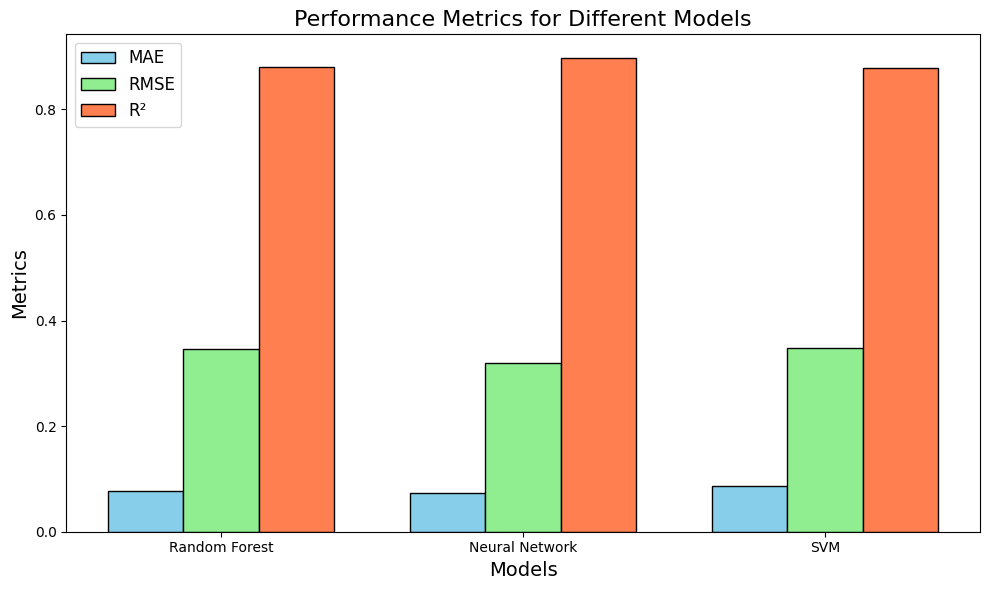

In [176]:
import matplotlib.pyplot as plt
import numpy as np

# Example performance metrics (replace with actual results)
models = ['Random Forest', 'Neural Network', 'SVM']
mae = [0.076860, 0.073361, 0.086463]  # Mean Absolute Error
rmse = [0.346248, 0.319806, 0.348745]  # Root Mean Squared Error
r2 = [0.879467, 0.897174, 0.877723]  # R-squared

# Create figure and axis
x = np.arange(len(models))  # Label locations
width = 0.25  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Bar plots for each metric
ax.bar(x - width, mae, width, label='MAE', color='skyblue', edgecolor='black')
ax.bar(x, rmse, width, label='RMSE', color='lightgreen', edgecolor='black')
ax.bar(x + width, r2, width, label='R²', color='coral', edgecolor='black')

# Add labels, title, and legend
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Metrics', fontsize=14)
ax.set_title('Performance Metrics for Different Models', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


Metrics Used:

    Mean Absolute Error (MAE): Average magnitude of prediction errors.
    Root Mean Squared Error (RMSE): Square root of the average squared errors.
    R-squared (R²): Proportion of variance explained by the model.

Implementation of ensemble models using Boosting techniques. We will utilize Gradient Boosting, XGBoost, LightGBM, and CatBoost for a regression task

In [177]:
!pip install catboost


In [179]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor

# Load the dataset
file_path = './OPTIMIZED_FEATURES_FOR_MODEL.xlsx'
fd_3 = pd.read_excel(file_path)

# Define features (X) and target (y)
target = "TURN_AROUND_TIME"  # Replace with your target column
X = fd_3 .drop(columns=[target])
y = fd_3 [target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R²): {r2:.4f}")
    print("-" * 40)
    return {"Model": model_name, "MAE": mae, "RMSE": rmse, "R2": r2}

# Initialize results storage
results = []

# 1. Gradient Boosting
print("Training Gradient Boosting...")
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)
results.append(evaluate_model(y_test, gbr_pred, "Gradient Boosting"))

# 2. XGBoost
print("Training XGBoost...")
xgbr = xgb.XGBRegressor(random_state=42, verbosity=0)
xgbr.fit(X_train, y_train)
xgbr_pred = xgbr.predict(X_test)
results.append(evaluate_model(y_test, xgbr_pred, "XGBoost"))

# 3. LightGBM
print("Training LightGBM...")
lgbm = lgb.LGBMRegressor(random_state=42)
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)
results.append(evaluate_model(y_test, lgbm_pred, "LightGBM"))

# 4. CatBoost
print("Training CatBoost...")
catboost = CatBoostRegressor(verbose=0, random_state=42)
catboost.fit(X_train, y_train)
catboost_pred = catboost.predict(X_test)
results.append(evaluate_model(y_test, catboost_pred, "CatBoost"))

# Compare Results
results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:")
print(results_df)

Training Gradient Boosting...
Gradient Boosting Performance:
Mean Absolute Error (MAE): 0.1632
Root Mean Squared Error (RMSE): 0.3917
R-squared (R²): 0.8493
----------------------------------------
Training XGBoost...
XGBoost Performance:
Mean Absolute Error (MAE): 0.1607
Root Mean Squared Error (RMSE): 0.3993
R-squared (R²): 0.8434
----------------------------------------
Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 377
[LightGBM] [Info] Number of data points in the train set: 2444, number of used features: 6
[LightGBM] [Info] Start training from score -0.010176
LightGBM Performance:
Mean Absolute Error (MAE): 0.1666
Root Mean Squared Error (RMSE): 0.3903
R-squared (R²): 0.8503
----------------------------------------
Training CatBoost...
Cat

COMPARISON

In [180]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models including Gradient Boosting
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42),
    "SVM": SVR(kernel='rbf', C=100, epsilon=0.1),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42),
    "CatBoost": CatBoostRegressor(verbose=0, random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[model_name] = {"MAE": mae, "RMSE": rmse, "R²": r2}

# Convert results to a DataFrame for easy comparison
results_df = pd.DataFrame(results).T
print("Comparison of Model Performance:")
print(results_df)

Training Random Forest...
Training Neural Network...
Training SVM...
Training Gradient Boosting...
Training XGBoost...
Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 377
[LightGBM] [Info] Number of data points in the train set: 2444, number of used features: 6
[LightGBM] [Info] Start training from score -0.010176
Training CatBoost...
Comparison of Model Performance:
                        MAE      RMSE        R²
Random Forest      0.160929  0.409769  0.835075
Neural Network     0.165721  0.388232  0.851956
SVM                0.175686  0.420519  0.826308
Gradient Boosting  0.163239  0.391674  0.849319
XGBoost            0.160688  0.399276  0.843413
LightGBM           0.166551  0.390

In [181]:
# Rebuilding and training the CatBoost model with optimal settings
from catboost import CatBoostRegressor

# Define the optimized CatBoost model
best_catboost_huber_model = CatBoostRegressor(
    loss_function="Huber:delta=1.0",
    iterations=500,
    learning_rate=0.05,
    depth=8,
    random_state=42,
    verbose=0
)

# Train the model on the training data
best_catboost_huber_model.fit(X_train, y_train)

# Generate predictions on the test set
y_pred_catboost = best_catboost_huber_model.predict(X_test)

# Transform predictions back to the original scale (if log-transformed target was used)
y_pred_catboost_original_scale = y_pred_catboost

# Transform predictions back to the original scale (if log-transformed target was used)
y_test_catboost_original_scale = y_test

# Save predictions alongside actual values for analysis
predictions_df = pd.DataFrame({
    "Actual": y_test_catboost_original_scale,
    "Predicted": y_pred_catboost_original_scale
}).reset_index(drop=True)

# Save predictions to a new Excel file
predictions_df.to_excel("CATBOOST_PREDICTIONS.xlsx", index=False)

predictions_df.head(30)


,Actual,Predicted
0,-0.565111,-0.675070
1,1.351501,1.207509
2,0.393195,0.560863
3,-0.004538,0.289342
4,-0.962844,-1.398442
5,-1.523417,-1.259382
6,-0.962844,-0.945929
7,-1.523417,-1.714762
8,-0.565111,-0.627908
9,-0.004538,0.037213
